

```
`# This is formatted as code`
```

# List of Stocks

**There is not no difference in the code between this and the file "Data Cleaning for Train Data.** I just want to keep it separate.

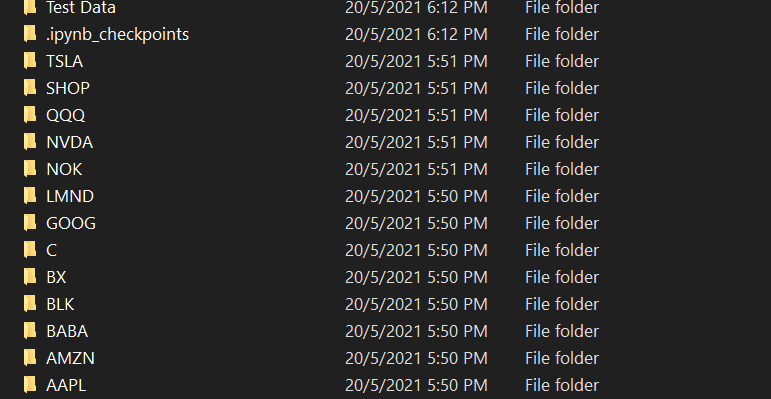

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
# drive.mount('/content/drive',force_remount=True)
root_path = 'gdrive/My Drive/2021 Capstone/Selected Tickers/' 


Mounted at /content/gdrive


In [ ]:
dir = "/content/gdrive/MyDrive/2021 Capstone/Selected Tickers/Test Data/SHOP_2021_March_to_May" # remember to change this to the ticker you want
path = f'{dir}.csv'
name = 'SHOP_Test' # change this as well

import glob
files = glob.glob(path)
for f in files:
  print(f)


/content/gdrive/MyDrive/2021 Capstone/Selected Tickers/Test Data/BX_2021_March_to_May.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame()
for yr in files:
  df = pd.concat([pd.read_csv(yr, parse_dates=['time'], index_col=1), df])
df.sort_index(inplace=True)
df.drop(['symbol'], axis=1, inplace=True)

df.head()

,askclose,askhigh,asklow,askopen,asksize,bidclose,bidhigh,bidlow,bidopen,bidsize,close,high,low,open,volume
time,,,,,,,,,,,,,,,
2021-03-01 09:31:00,69.754995,69.854079,69.566736,69.854079,300.0,69.685637,69.735178,69.378477,69.378477,200.0,69.695545,69.824354,69.556828,69.606369,74554.0
2021-03-01 09:32:00,69.903621,70.101788,69.705453,69.754995,300.0,69.685637,69.982888,69.646003,69.685637,100.0,69.888758,70.091781,69.695545,69.745087,38999.0
2021-03-01 09:33:00,69.636095,69.903621,69.537011,69.903621,300.0,69.576644,69.695545,69.507286,69.685637,200.0,69.626186,69.769858,69.537011,69.705453,14429.0
2021-03-01 09:34:00,69.943254,69.972980,69.636095,69.636095,200.0,69.873896,69.873896,69.576644,69.576644,100.0,69.882120,69.898667,69.636095,69.636095,5975.0
2021-03-01 09:35:00,70.072063,70.101788,69.873896,69.943254,200.0,69.992796,70.072063,69.844171,69.873896,200.0,70.027476,70.091880,69.873896,69.880633,9762.0


In [ ]:
df = df[["close", "high", "low", "open", "volume"]]
df.head()

,close,high,low,open,volume
time,,,,,
2021-03-01 09:31:00,69.695545,69.824354,69.556828,69.606369,74554.0
2021-03-01 09:32:00,69.888758,70.091781,69.695545,69.745087,38999.0
2021-03-01 09:33:00,69.626186,69.769858,69.537011,69.705453,14429.0
2021-03-01 09:34:00,69.882120,69.898667,69.636095,69.636095,5975.0
2021-03-01 09:35:00,70.027476,70.091880,69.873896,69.880633,9762.0


In [ ]:
## Verify Data has loaded 
print(f"No. of data points: {len(df)}")
print(f"Start of raw data: {df.index[0]}")
print(f"End of raw data: {df.index[-1]}")


No. of data points: 21060
Start of raw data: 2021-03-01 09:31:00
End of raw data: 2021-05-14 16:00:00


# Data Preprocessing 

In [ ]:
start = '2021-02'
end = '2021-05'

df = df.loc[start:end].copy()

print("After filtering:")
print(f"No. of data points: {len(df)}")
print(f"Start of raw data: {df.index[0]}")
print(f"End of raw data: {df.index[-1]}")

After filtering:
No. of data points: 21060
Start of raw data: 2021-03-01 09:31:00
End of raw data: 2021-05-14 16:00:00


In [ ]:
df['prev_high'] = df['high'].shift(1)
df['fod_high'] = df['high'] - df['high'].shift(1)
df['spread'] = (df['high'] - df['low'])
df['return'] = df['close'] / df['open'] - 1
df.drop(['close', 'low', 'open'], axis=1, inplace=True)
# Because of first-order difference, we have to discard the very first entry.
df = df.iloc[1:].copy()

In [ ]:
def dfplot(input_df, size=(20,10)):
  # plot each column
  plt.figure(figsize=size)
  for cnt, feature in enumerate(input_df.columns):
    plt.subplot(len(input_df.columns), 1, cnt+1)
    plt.plot(input_df[feature])
    plt.title(feature, y=0.5, loc='right')
  plt.show()

In [ ]:
df.head()

,high,volume,prev_high,fod_high,spread,return
time,,,,,,
2021-03-01 09:32:00,70.091781,38999.0,69.824354,0.267427,0.396236,0.002060
2021-03-01 09:33:00,69.769858,14429.0,70.091781,-0.321923,0.232847,-0.001137
2021-03-01 09:34:00,69.898667,5975.0,69.769858,0.128809,0.262572,0.003533
2021-03-01 09:35:00,70.091880,9762.0,69.898667,0.193213,0.217984,0.002101
2021-03-01 09:36:00,70.052247,9681.0,70.091880,-0.039634,0.158534,-0.001557


In [ ]:
df.tail()

,high,volume,prev_high,fod_high,spread,return
time,,,,,,
2021-05-14 15:56:00,87.560,22015.0,87.585,-0.025,0.050,-0.000571
2021-05-14 15:57:00,87.520,27653.0,87.560,-0.040,0.050,-0.000171
2021-05-14 15:58:00,87.510,27347.0,87.520,-0.010,0.070,0.000400
2021-05-14 15:59:00,87.505,28316.0,87.510,-0.005,0.105,-0.000943
2021-05-14 16:00:00,87.480,257990.0,87.505,-0.025,0.060,0.000686


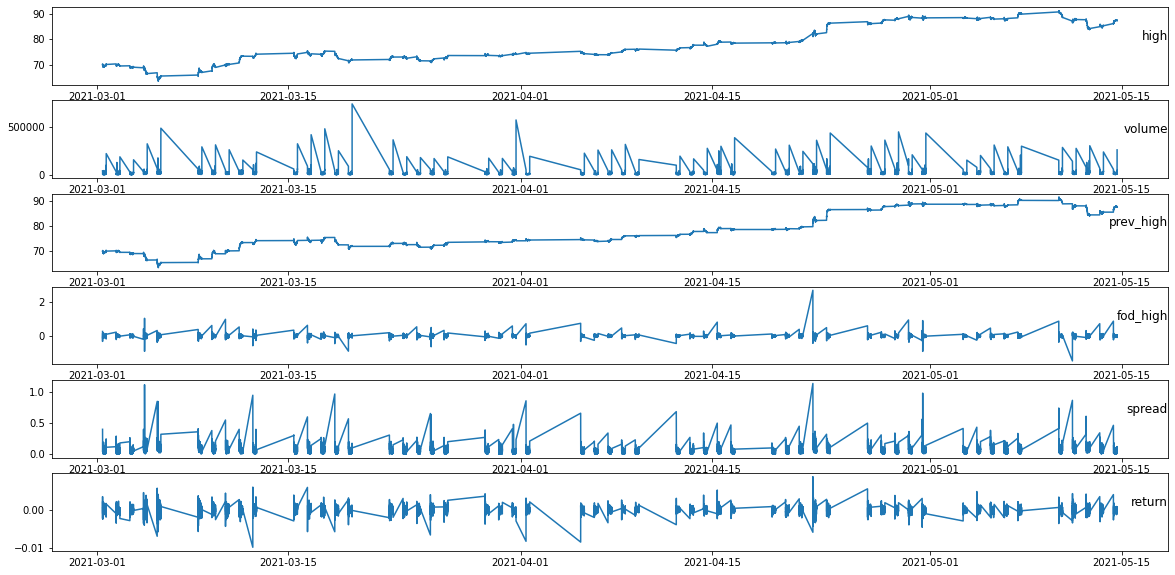

In [ ]:
# plot each column
dfplot(df)

# Data Reordering 

In [ ]:
# reorder columns
col_names = ['fod_high', 'volume', 'spread', 'return']
df1 = df[col_names]

# feat_names = col_names[1:]
# tgt_name = col_names[0]

In [ ]:
# Print the first few rows
df1.head()

,fod_high,volume,spread,return
time,,,,
2021-03-01 09:32:00,0.267427,38999.0,0.396236,0.002060
2021-03-01 09:33:00,-0.321923,14429.0,0.232847,-0.001137
2021-03-01 09:34:00,0.128809,5975.0,0.262572,0.003533
2021-03-01 09:35:00,0.193213,9762.0,0.217984,0.002101
2021-03-01 09:36:00,-0.039634,9681.0,0.158534,-0.001557


In [ ]:
# Print the last few rows
df1.tail()

,fod_high,volume,spread,return
time,,,,
2021-05-14 15:56:00,-0.025,22015.0,0.050,-0.000571
2021-05-14 15:57:00,-0.040,27653.0,0.050,-0.000171
2021-05-14 15:58:00,-0.010,27347.0,0.070,0.000400
2021-05-14 15:59:00,-0.005,28316.0,0.105,-0.000943
2021-05-14 16:00:00,-0.025,257990.0,0.060,0.000686


In [ ]:
# We will use df instead of df1 since we only need the "high" and "volume" data

ticker = df
ticker.head() # create a copy|


,high,volume,prev_high,fod_high,spread,return
time,,,,,,
2021-03-01 09:32:00,70.091781,38999.0,69.824354,0.267427,0.396236,0.002060
2021-03-01 09:33:00,69.769858,14429.0,70.091781,-0.321923,0.232847,-0.001137
2021-03-01 09:34:00,69.898667,5975.0,69.769858,0.128809,0.262572,0.003533
2021-03-01 09:35:00,70.091880,9762.0,69.898667,0.193213,0.217984,0.002101
2021-03-01 09:36:00,70.052247,9681.0,70.091880,-0.039634,0.158534,-0.001557


In [ ]:
ticker.drop(['prev_high', 'fod_high', 'spread', 'return'], axis=1, inplace=True)

In [ ]:
# Double check on data
ticker.head()

,high,volume
time,,
2021-03-01 09:32:00,70.091781,38999.0
2021-03-01 09:33:00,69.769858,14429.0
2021-03-01 09:34:00,69.898667,5975.0
2021-03-01 09:35:00,70.091880,9762.0
2021-03-01 09:36:00,70.052247,9681.0


In [ ]:
# Save Ticker File as CSV and TXT
from google.colab import files
ticker.to_csv(f"{name}.txt", sep='\t', index=False) # TXT
ticker.to_csv(f"{name}.csv", index=False) # CSV

files.download(f"{name}.csv")
files.download(f"{name}.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Print total number of samples to split later
print(f"No. of data points in {name} dataset: {len(ticker)}")

No. of data points in BX_Test dataset: 21059


In [ ]:
ticker.tail()

,high,volume
time,,
2021-05-14 15:56:00,87.560,22015.0
2021-05-14 15:57:00,87.520,27653.0
2021-05-14 15:58:00,87.510,27347.0
2021-05-14 15:59:00,87.505,28316.0
2021-05-14 16:00:00,87.480,257990.0
